TASK 2: Unemployment Analysis with Python 

● Analyze unemployment rate data representing unemployed people percentage. 
● Use Python for data cleaning, exploration, and visualization of unemployment trends. 
● Investigate the impact of Covid-19 on unemployment rates. 
● Identify key patterns or seasonal trends in the data. 
● Present insights that could inform economic or social policies. 
● DOWNLOAD DATASET FROM here 

Imports & File Paths   

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make an output folder for charts/tables
os.makedirs("outputs", exist_ok=True)

FILE1 = "DATA/Unemployment in India.csv"
FILE2 = "DATA/Unemployment_Rate_upto_11_2020.csv"


Load & Inspect Raw Data

In [7]:
df1_raw = pd.read_csv(FILE1)
df2_raw = pd.read_csv(FILE2)

print("DF1 shape:", df1_raw.shape)
print("DF2 shape:", df2_raw.shape)
print("\nDF1 columns:", list(df1_raw.columns))
print("DF2 columns:", list(df2_raw.columns))

print("\nDF1 preview:")
display(df1_raw.head())
print("\nDF2 preview:")
display(df2_raw.head())


DF1 shape: (768, 7)
DF2 shape: (267, 9)

DF1 columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']
DF2 columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']

DF1 preview:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



DF2 preview:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
df1_raw.info()
df1_raw.describe()
df1_raw.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
df2_raw.info()
df2_raw.describe()
df2_raw.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Clean Column Names & Standardize Schema

In [11]:
def clean_cols(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out.columns = [c.strip().replace("  ", " ") for c in out.columns]
    return out

df1 = clean_cols(df1_raw)
df2 = clean_cols(df2_raw)

# Rename to a common schema
rename_map = {
    "Region": "region",
    "Date": "date",
    "Frequency": "frequency",
    "Estimated Unemployment Rate (%)": "unemployment_rate",
    "Estimated Employed": "employed",
    "Estimated Labour Participation Rate (%)": "labour_participation_rate",
    "Area": "area",
    "Region.1": "zone",
}

df1 = df1.rename(columns=rename_map)
df2 = df2.rename(columns=rename_map)

# Parse dates
for d in (df1, df2):
    if "date" in d.columns:
        d["date"] = pd.to_datetime(d["date"], errors="coerce")

# Ensure all expected columns exist (fill missing ones)
expected = [
    "region","date","frequency","unemployment_rate","employed",
    "labour_participation_rate","area","zone","longitude","latitude"
]
for col in expected:
    if col not in df1.columns: df1[col] = np.nan
    if col not in df2.columns: df2[col] = np.nan

# add source tags
df1["source"] = "dataset1"
df2["source"] = "dataset2"


C:\Users\atifb\AppData\Local\Temp\ipykernel_15436\1235000264.py:27: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d["date"] = pd.to_datetime(d["date"], errors="coerce")
C:\Users\atifb\AppData\Local\Temp\ipykernel_15436\1235000264.py:27: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d["date"] = pd.to_datetime(d["date"], errors="coerce")


Merge, Basic Cleaning, Save Clean Data

In [14]:
merged = pd.concat(
    [df1[expected + ["source"]], df2[expected + ["source"]]], 
    ignore_index=True
)

# core cleaning
merged = merged.dropna(subset=["region", "date", "unemployment_rate"])
merged = merged[(merged["unemployment_rate"] >= 0) & (merged["unemployment_rate"] <= 100)]
merged = merged.sort_values("date").reset_index(drop=True)

# Convenience time columns
merged["year"]  = merged["date"].dt.year
merged["month"] = merged["date"].dt.month

print("Merged shape:", merged.shape)
print("Date range:", merged["date"].min(), "→", merged["date"].max())
print("States:", merged["region"].nunique())

# Save cleaned merged
merged.to_csv("outputs/unemployment_merged_clean.csv", index=False)
print("Saved: outputs/unemployment_merged_clean.csv")


Merged shape: (1007, 13)
Date range: 2019-05-31 00:00:00 → 2020-10-31 00:00:00
States: 28
Saved: outputs/unemployment_merged_clean.csv


National Trend Over Time (Covid line)

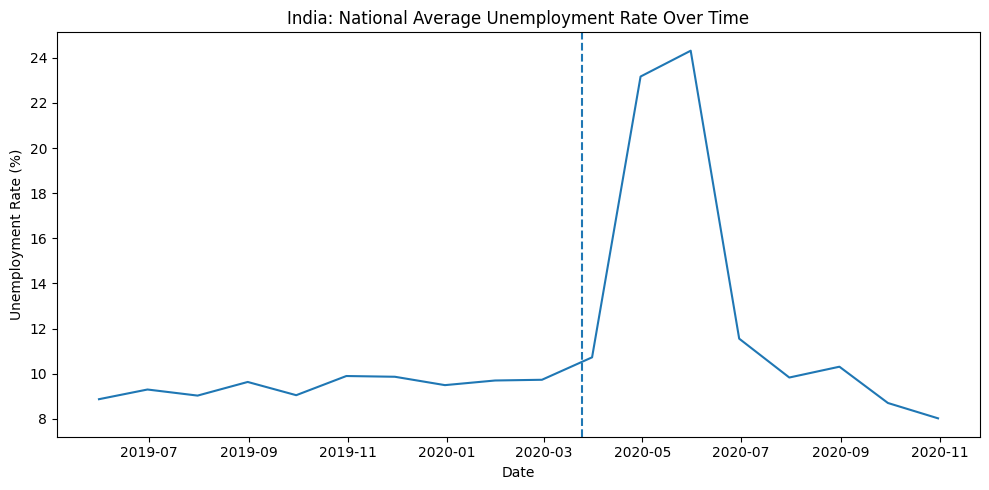

In [15]:
nat = merged.groupby("date", as_index=False)["unemployment_rate"].mean()

plt.figure(figsize=(10,5))
plt.plot(nat["date"], nat["unemployment_rate"])
plt.title("India: National Average Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")

# India national lockdown start (approx): 2020-03-25
lockdown = pd.to_datetime("2020-03-25")
plt.axvline(x=lockdown, linestyle="--")
plt.tight_layout()
plt.savefig("outputs/01_national_trend.png", dpi=200)
plt.show()


Covid Impact: 2019 vs 2020 Comparison

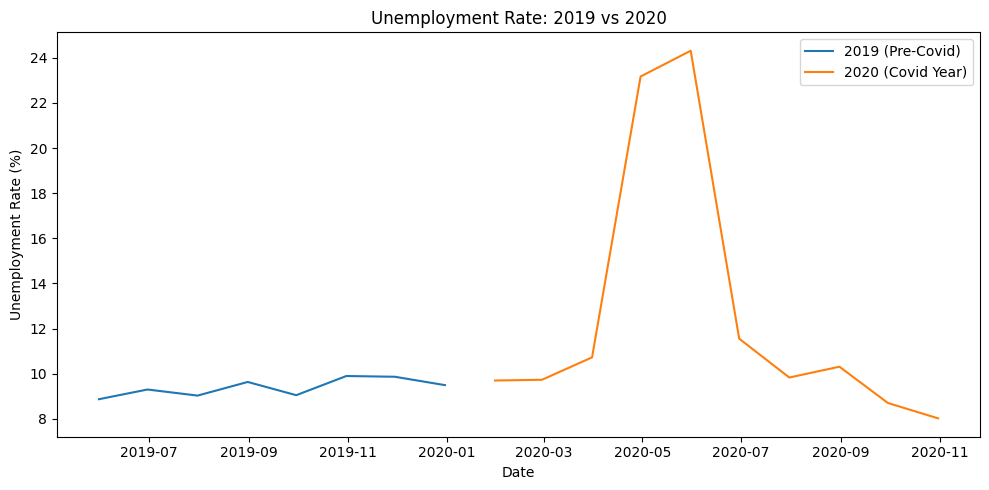

Avg 2019: 9.40%
Avg 2020: 12.61%
Change (2020 - 2019): 3.21 percentage points


In [16]:
nat["year"] = nat["date"].dt.year
nat_2019 = nat[nat["year"] == 2019]
nat_2020 = nat[nat["year"] == 2020]

plt.figure(figsize=(10,5))
if not nat_2019.empty:
    plt.plot(nat_2019["date"], nat_2019["unemployment_rate"], label="2019 (Pre-Covid)")
if not nat_2020.empty:
    plt.plot(nat_2020["date"], nat_2020["unemployment_rate"], label="2020 (Covid Year)")
plt.title("Unemployment Rate: 2019 vs 2020")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/02_2019_vs_2020.png", dpi=200)
plt.show()

# Numeric summary for reporting
avg_2019 = nat_2019["unemployment_rate"].mean() if not nat_2019.empty else np.nan
avg_2020 = nat_2020["unemployment_rate"].mean() if not nat_2020.empty else np.nan
delta = (avg_2020 - avg_2019) if pd.notna(avg_2019) and pd.notna(avg_2020) else np.nan

print(f"Avg 2019: {avg_2019:.2f}%")
print(f"Avg 2020: {avg_2020:.2f}%")
print(f"Change (2020 - 2019): {delta:.2f} percentage points")


Urban vs Rural Trends

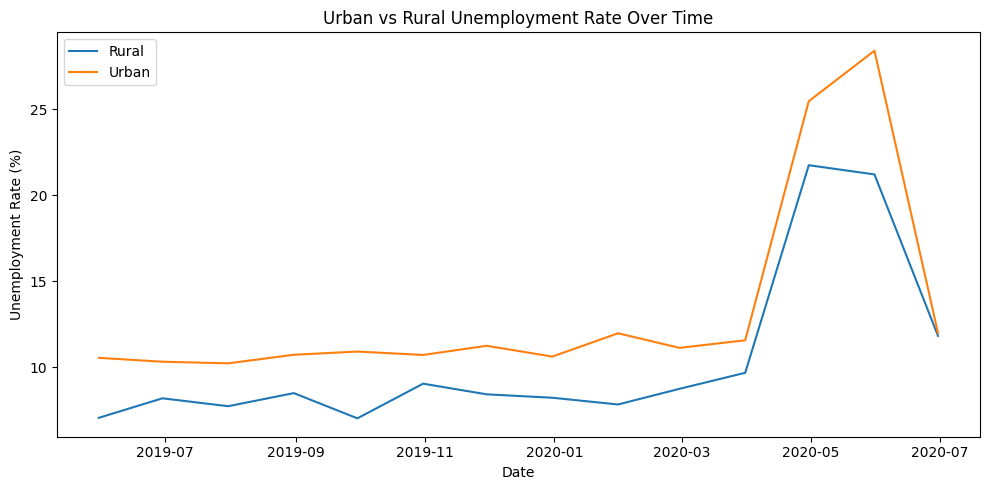


2020 Average Unemployment by Area:
area
Urban    16.654528
Rural    13.466358
Name: unemployment_rate, dtype: float64


In [17]:
area_df = merged.dropna(subset=["area"])
if not area_df.empty:
    area_ts = area_df.groupby(["date","area"], as_index=False)["unemployment_rate"].mean()

    plt.figure(figsize=(10,5))
    for ar in sorted(area_ts["area"].unique()):
        tmp = area_ts[area_ts["area"] == ar]
        plt.plot(tmp["date"], tmp["unemployment_rate"], label=ar)
    plt.title("Urban vs Rural Unemployment Rate Over Time")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("outputs/03_urban_rural_trend.png", dpi=200)
    plt.show()

    # 2020 averages by area
    area_2020 = area_df[area_df["year"] == 2020].groupby("area")["unemployment_rate"].mean().sort_values(ascending=False)
    print("\n2020 Average Unemployment by Area:")
    print(area_2020)
else:
    print("No 'area' data present to compare Urban vs Rural.")


Zone/Region Comparison in 2020 (from dataset2)

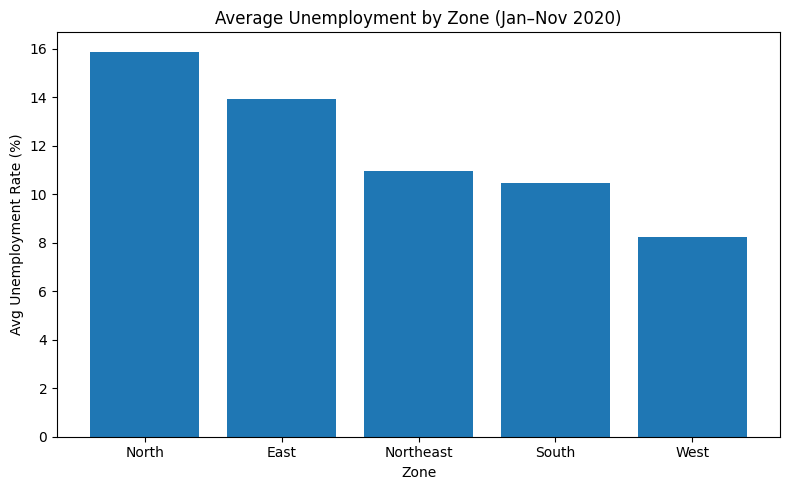

Saved: outputs/zone_avg_2020.csv


In [18]:
zone_2020 = merged[(merged["year"] == 2020) & merged["zone"].notna()]
if not zone_2020.empty:
    zone_avg = (zone_2020.groupby("zone", as_index=False)["unemployment_rate"]
                .mean()
                .sort_values("unemployment_rate", ascending=False))

    plt.figure(figsize=(8,5))
    plt.bar(zone_avg["zone"], zone_avg["unemployment_rate"])
    plt.title("Average Unemployment by Zone (Jan–Nov 2020)")
    plt.xlabel("Zone")
    plt.ylabel("Avg Unemployment Rate (%)")
    plt.tight_layout()
    plt.savefig("outputs/04_zone_avg_2020.png", dpi=200)
    plt.show()

    zone_avg.to_csv("outputs/zone_avg_2020.csv", index=False)
    print("Saved: outputs/zone_avg_2020.csv")
else:
    print("No 'zone' info present for 2020 zone comparison.")


State-Level Leaders/Laggards in 2020

Saved: outputs/top10_states_2020.csv, outputs/bottom10_states_2020.csv


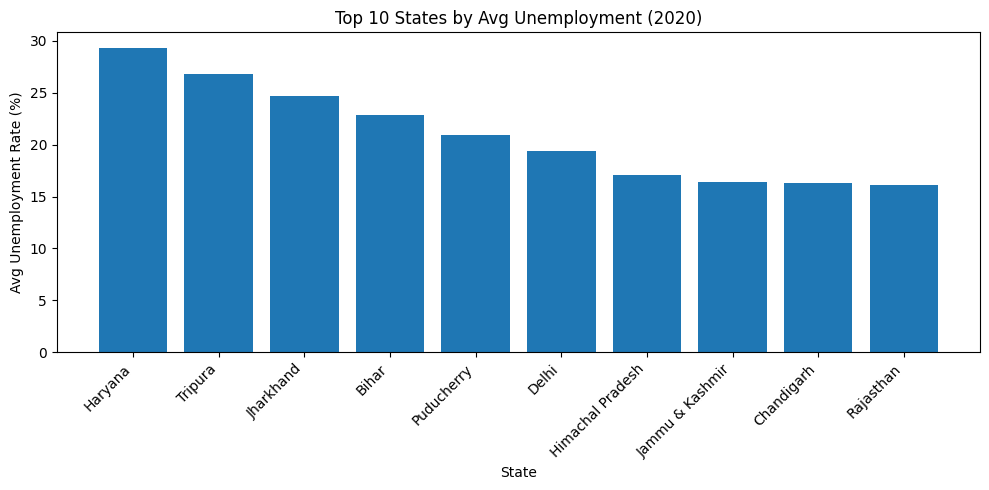

In [19]:
state_2020 = merged[merged["year"] == 2020]
state_avg_2020 = (state_2020.groupby("region", as_index=False)["unemployment_rate"]
                  .mean()
                  .sort_values("unemployment_rate", ascending=False))

# Top 10 highest & lowest
top10 = state_avg_2020.head(10)
bottom10 = state_avg_2020.tail(10).sort_values("unemployment_rate")

top10.to_csv("outputs/top10_states_2020.csv", index=False)
bottom10.to_csv("outputs/bottom10_states_2020.csv", index=False)
print("Saved: outputs/top10_states_2020.csv, outputs/bottom10_states_2020.csv")

plt.figure(figsize=(10,5))
plt.bar(top10["region"], top10["unemployment_rate"])
plt.title("Top 10 States by Avg Unemployment (2020)")
plt.xlabel("State")
plt.ylabel("Avg Unemployment Rate (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("outputs/05_top10_states_2020.png", dpi=200)
plt.show()


Seasonality (Monthly Patterns)

Saved: outputs/monthly_avg_by_year.csv


year,2019,2020
month,,
1,NaN,9.702532
2,NaN,9.734810
3,NaN,10.728608
4,NaN,23.167013
5,8.874259,24.310769
6,9.303333,11.555584
7,9.033889,9.834444
8,9.637925,10.313333
9,9.051731,8.705926


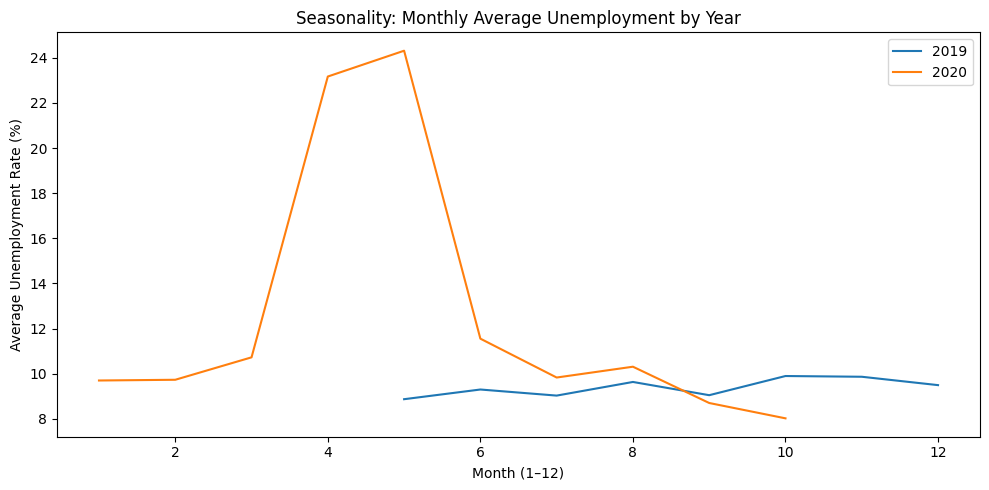

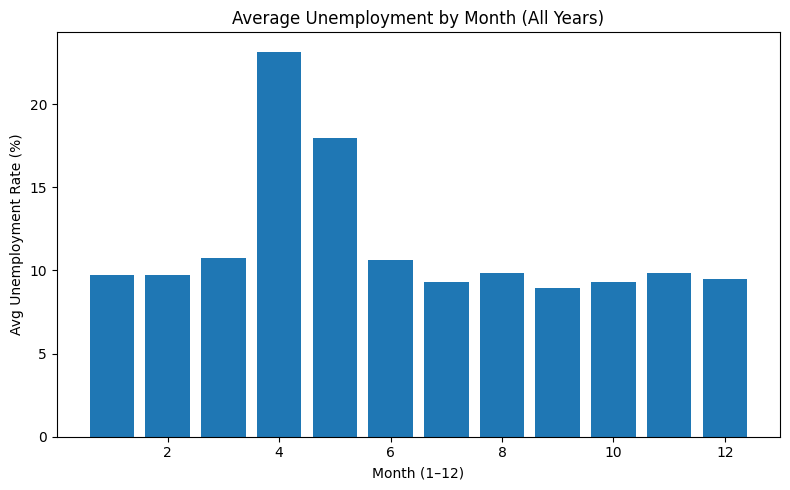

In [20]:
seasonal = merged.groupby(["year","month"], as_index=False)["unemployment_rate"].mean()

# Quick table to inspect
seasonal_pivot = seasonal.pivot(index="month", columns="year", values="unemployment_rate").sort_index()
seasonal_pivot.to_csv("outputs/monthly_avg_by_year.csv")
print("Saved: outputs/monthly_avg_by_year.csv")
display(seasonal_pivot)

# Line per available year (kept simple)
plt.figure(figsize=(10,5))
for y in sorted(seasonal["year"].unique()):
    tmp = seasonal[seasonal["year"] == y]
    plt.plot(tmp["month"], tmp["unemployment_rate"], label=str(y))
plt.title("Seasonality: Monthly Average Unemployment by Year")
plt.xlabel("Month (1–12)")
plt.ylabel("Average Unemployment Rate (%)")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/06_seasonality_lines.png", dpi=200)
plt.show()

# Optional: overall monthly distribution (all years combined)
month_avg = merged.groupby("month", as_index=False)["unemployment_rate"].mean()
plt.figure(figsize=(8,5))
plt.bar(month_avg["month"], month_avg["unemployment_rate"])
plt.title("Average Unemployment by Month (All Years)")
plt.xlabel("Month (1–12)")
plt.ylabel("Avg Unemployment Rate (%)")
plt.tight_layout()
plt.savefig("outputs/07_monthly_avg_bar.png", dpi=200)
plt.show()


Peaks, Troughs, and Covid Spike Quantification

In [21]:
def peak_trough(df_nat: pd.DataFrame):
    if df_nat.empty:
        return (np.nan, pd.NaT, np.nan, pd.NaT)
    idx_max = df_nat["unemployment_rate"].idxmax()
    idx_min = df_nat["unemployment_rate"].idxmin()
    return (
        df_nat.loc[idx_max, "unemployment_rate"],
        df_nat.loc[idx_max, "date"],
        df_nat.loc[idx_min, "unemployment_rate"],
        df_nat.loc[idx_min, "date"],
    )

pk19, dt19_pk, tr19, dt19_tr = np.nan, pd.NaT, np.nan, pd.NaT
pk20, dt20_pk, tr20, dt20_tr = np.nan, pd.NaT, np.nan, pd.NaT

if not nat_2019.empty:
    pk19, dt19_pk, tr19, dt19_tr = peak_trough(nat_2019)
if not nat_2020.empty:
    pk20, dt20_pk, tr20, dt20_tr = peak_trough(nat_2020)

summary = pd.DataFrame([{
    "Year": 2019, "Peak (%)": round(pk19,2) if pd.notna(pk19) else np.nan,
    "Peak Date": dt19_pk, "Trough (%)": round(tr19,2) if pd.notna(tr19) else np.nan,
    "Trough Date": dt19_tr, "Average (%)": round(avg_2019,2) if pd.notna(avg_2019) else np.nan
},{
    "Year": 2020, "Peak (%)": round(pk20,2) if pd.notna(pk20) else np.nan,
    "Peak Date": dt20_pk, "Trough (%)": round(tr20,2) if pd.notna(tr20) else np.nan,
    "Trough Date": dt20_tr, "Average (%)": round(avg_2020,2) if pd.notna(avg_2020) else np.nan
}])

summary.to_csv("outputs/key_metrics_2019_2020.csv", index=False)
print("Saved: outputs/key_metrics_2019_2020.csv")
display(summary)


Saved: outputs/key_metrics_2019_2020.csv


,Year,Peak (%),Peak Date,Trough (%),Trough Date,Average (%)
0,2019,9.90,2019-10-31,8.87,2019-05-31,9.40
1,2020,24.31,2020-05-31,8.03,2020-10-31,12.61


In [22]:
lines = []
lines.append("# Unemployment Analysis (India) – Summary")
lines.append("")
lines.append(f"Coverage: {merged['date'].min().date()} to {merged['date'].max().date()}, states: {merged['region'].nunique()}.")
if pd.notna(avg_2019) and pd.notna(avg_2020):
    lines.append(f"National average rose from {avg_2019:.2f}% (2019) to {avg_2020:.2f}% (2020), change {delta:.2f} p.p.")
if pd.notna(pk20) and isinstance(dt20_pk, pd.Timestamp):
    lines.append(f"2020 peak: {pk20:.2f}% on {dt20_pk.date()} (Covid shock).")
if pd.notna(pk19) and isinstance(dt19_pk, pd.Timestamp):
    lines.append(f"2019 peak: {pk19:.2f}% on {dt19_pk.date()}.")
if "area" in merged.columns and merged["area"].notna().any():
    area_2020_txt = (merged[merged["year"]==2020]
                     .dropna(subset=["area"])
                     .groupby("area")["unemployment_rate"].mean().sort_values(ascending=False))
    if not area_2020_txt.empty:
        lines.append("2020 Urban/Rural averages: " + ", ".join([f"{k}: {v:.2f}%" for k,v in area_2020_txt.items()]))

with open("outputs/summary.md", "w", encoding="utf-8") as f:
    f.write("\n".join(lines))
print("Saved: outputs/summary.md")


Saved: outputs/summary.md
